# Основные концепции Machine Learning. Домашняя работа

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('/home/arcry/anaconda3/SkillBox/files/ML_1/1.8_phones.csv')
data.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


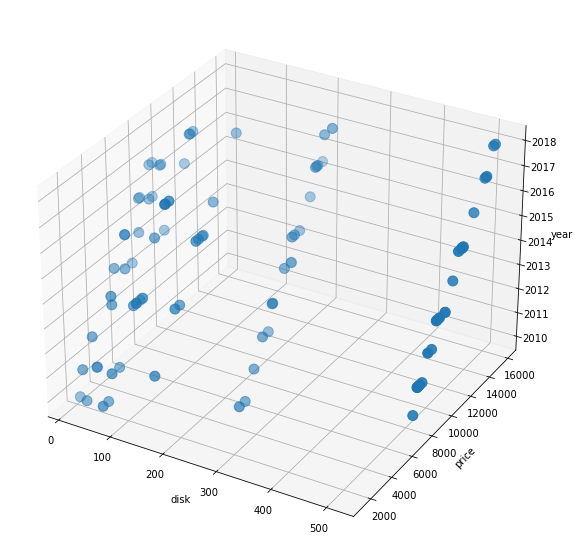

In [14]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(data["disk"], data["price"], data['year'], s=100)

# называем оси
ax.set_xlabel("disk")
ax.set_ylabel("price")
ax.set_zlabel("year")

# отображаем картинку
plt.show()

Задание 1: обучить модель регрессии

In [10]:
# импортируем модуль, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression

In [9]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = data[['disk', 'price']]
y = data['year']

In [11]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [24]:
linreg.predict(X[0:3]), y[0:3]

(array([2015.38606986, 2014.90847941, 2010.31820162]),
 0    2016
 1    2015
 2    2010
 Name: year, dtype: int64)

In [25]:
# сделаем предсказания для различных конфигураций домов
d1, d2 = list(), list()
for x in np.linspace(min(data['disk']), max(data['disk']), 100):
    for y in np.linspace(min(data['price']), max(data['price']), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = linreg.predict(np.concatenate([d1, d2], axis=1))

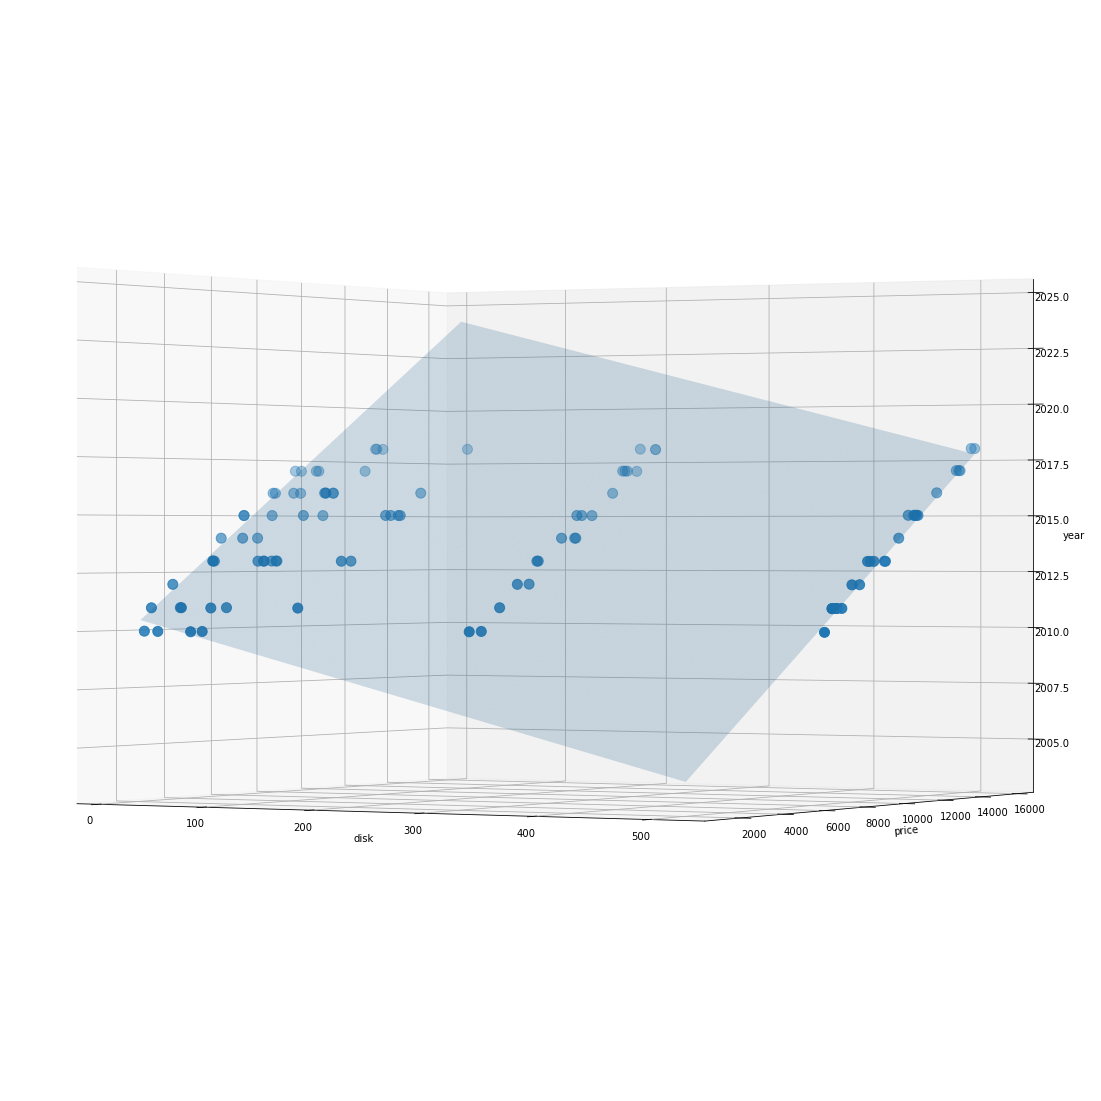

In [31]:
fig = plt.figure(figsize=(20, 20)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем предсказанные значения на график
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)
#  помещаем точки на график 
ax.scatter(data["disk"], data["price"], data['year'], s=100)

# называем оси
ax.set_xlabel("disk")
ax.set_ylabel("price")
ax.set_zlabel("year")

# изменяем позицию камеры и отрисовываем картинку
ax.elev = 0
plt.show()

Задание 2: обучить модель классификации

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier


In [67]:
data['os_n'] = data['os'].apply(lambda x: 1 if x == 'iOS' else 0)
data

,disk,os,price,year,os_n
0,64,Android,7256,2016,0
1,128,Android,7623,2015,0
2,64,Android,1916,2010,0
3,512,iOS,15045,2017,1
4,16,Android,4478,2013,0
...,...,...,...,...,...
95,512,iOS,8398,2011,1
96,64,Android,7197,2016,0
97,32,Android,5694,2014,0
98,32,Android,7589,2016,0


In [68]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = data[['disk', 'price']]
y = data['os_n']

In [59]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [70]:
clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

In [69]:
# проведем классификацию
clf.predict(X[7:12]), y[7:12]

(array(['Android', 'iOS', 'Android', 'iOS', 'Android'], dtype=object),
 7     0
 8     1
 9     0
 10    1
 11    0
 Name: os_n, dtype: int64)

In [76]:
clf.predict_proba(X[7:12])[:,1]

array([0.  , 1.  , 0.01, 1.  , 0.13])

In [72]:
 from sklearn.metrics import roc_auc_score

In [79]:
roc_auc_score(y, clf.predict_proba(X)[:,1])

1.0

Задание 3: обучить модель кластеризации

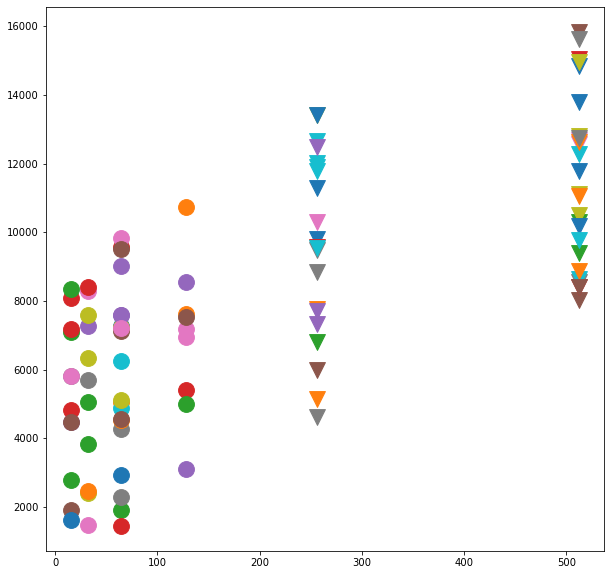

In [130]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(data["disk"], data["price"], data['os']):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# отображаем картинку
plt.show()

In [149]:
data['year'].unique()

array([2016, 2015, 2010, 2017, 2013, 2018, 2012, 2011, 2014])

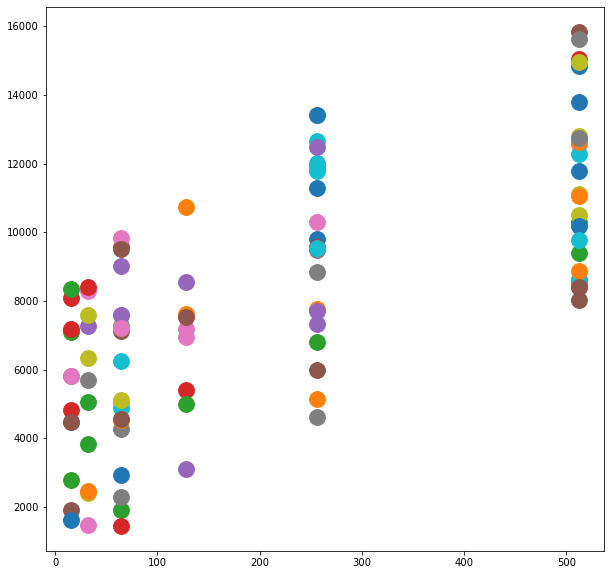

In [148]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
da
markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(data["disk"], data["price"], data['os']):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# отображаем картинку
plt.show()

In [121]:
from sklearn.cluster import KMeans

In [140]:
X = data[['disk', 'price']]

In [145]:
clust = KMeans(n_clusters=2)
clust.fit(X)

KMeans(n_clusters=2)

In [142]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [146]:
# смотрим центры кластеров
[c1, c2] = clust.cluster_centers_
clust.cluster_centers_

array([[  116.8       ,  5784.78333333],
       [  368.        , 11601.65      ]])

In [147]:
clust.predict(X[7:12]), y[7:12]

(array([0, 1, 0, 1, 1], dtype=int32),
 7     0
 8     1
 9     0
 10    1
 11    0
 Name: os_n, dtype: int64)

In [136]:
roc_auc_score(y, clust.predict(X)) # в данном случае задача кластеризации не очень хорошо подходит

0.36350863107185866